In [42]:
#Import libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
# %matplotlib inline #matplotlib formatting
from sklearn.utils import resample


cardio = pd.read_csv( "/Users/monikajakkamputi/projects/code/git/Cardiovascular-disease-analysis/cardio_disease.csv", sep = ';') #import csv file with commas as delimeter

In [3]:
cardio.head(10) #show top 10 records

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
#check for missing columns
for col in cardio.columns:
    pct_missing = np.mean(cardio[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
age - 0%
gender - 0%
height - 0%
weight - 0%
ap_hi - 0%
ap_lo - 0%
cholesterol - 0%
gluc - 0%
smoke - 0%
alco - 0%
active - 0%
cardio - 0%


In [5]:
cardio.duplicated().sum() #check for number of duplicate rows

0

In [6]:
cardio.drop_duplicates(inplace=True) #drop duplicate rows

In [7]:
cardio.duplicated().sum()

0

In [8]:
cardio.info #review info

<bound method DataFrame.info of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       

In [9]:
cardio.insert(4, 'BMI', round((cardio['weight']/(cardio['height']/100)**2),2)) #add BMI calculated column

In [10]:
cardio.info #review info with new column

<bound method DataFrame.info of           id    age  gender  height    BMI  weight  ap_hi  ap_lo  cholesterol  \
0          0  18393       2     168  21.97    62.0    110     80            1   
1          1  20228       1     156  34.93    85.0    140     90            3   
2          2  18857       1     165  23.51    64.0    130     70            3   
3          3  17623       2     169  28.71    82.0    150    100            1   
4          4  17474       1     156  23.01    56.0    100     60            1   
...      ...    ...     ...     ...    ...     ...    ...    ...          ...   
69995  99993  19240       2     168  26.93    76.0    120     80            1   
69996  99995  22601       1     158  50.47   126.0    140     90            2   
69997  99996  19066       2     183  31.35   105.0    180     90            3   
69998  99998  22431       1     163  27.10    72.0    135     80            1   
69999  99999  20540       1     170  24.91    72.0    120     80            2

In [11]:
gender = cardio.groupby(["gender"]).size().reset_index(name="Cnt") #review gender

In [12]:
gender

,gender,Cnt
0,1,45530
1,2,24470


In [13]:
cardio.describe()

,id,age,gender,height,BMI,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,27.556545,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,6.091405,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,3.470000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,23.880000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,26.375000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,30.220000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,298.670000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='weight', ylabel='Count'>

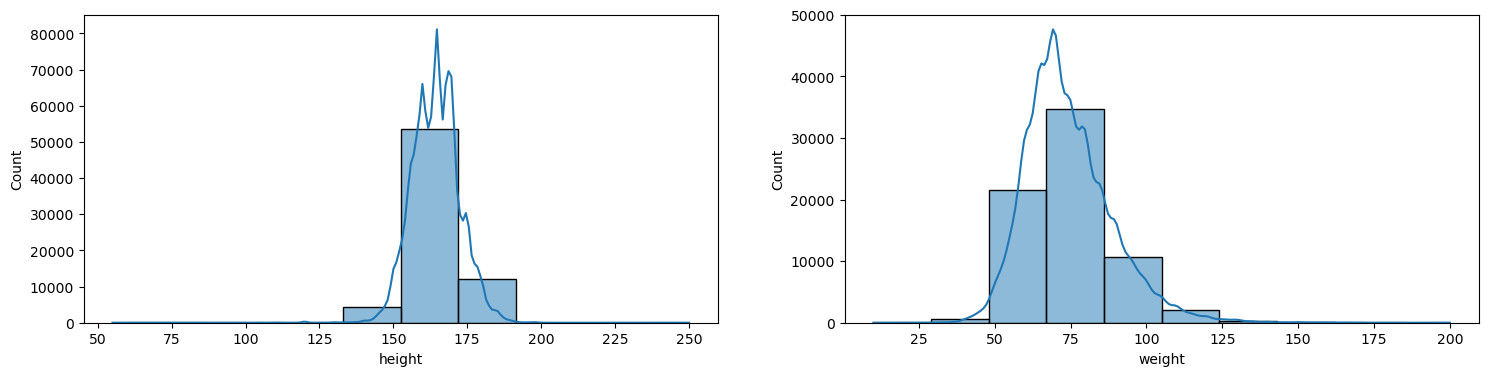

In [17]:
fig, axes = plt.subplots(1,2, figsize=(18,4))
sns.histplot(cardio.height, bins=10, kde=True, ax=axes[0])
sns.histplot(cardio.weight, bins=10, kde=True, ax=axes[1])

<AxesSubplot:xlabel='gender', ylabel='weight'>

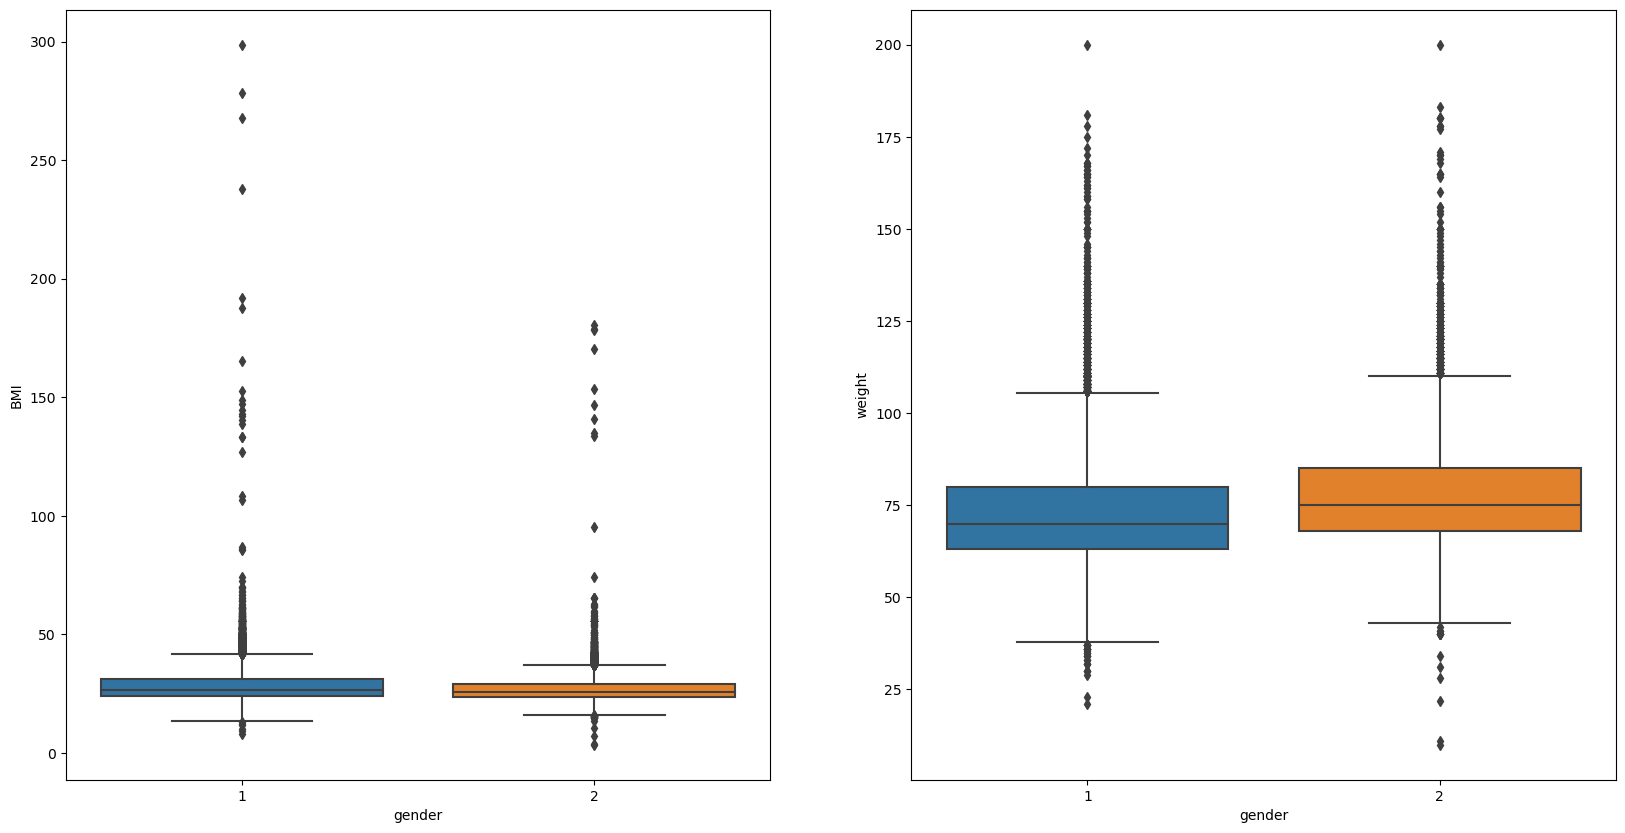

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(data=cardio, x='gender', y='BMI', ax=ax[0])
sns.boxplot(data=cardio, x='gender', y='weight', ax = ax[1)

<AxesSubplot:xlabel='height', ylabel='Count'>

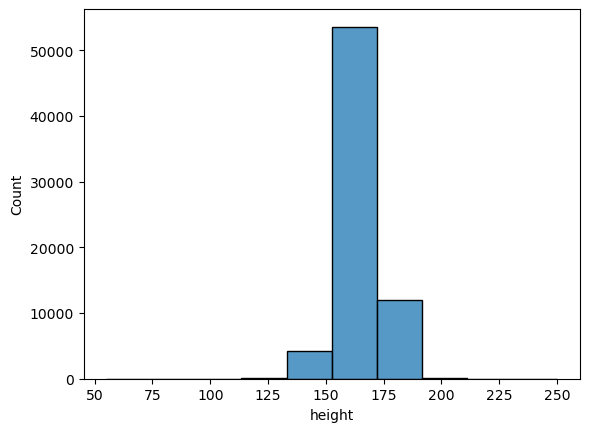

In [ ]:
sns.histplot(cardio.height, bins=10)

<AxesSubplot:xlabel='weight', ylabel='Count'>

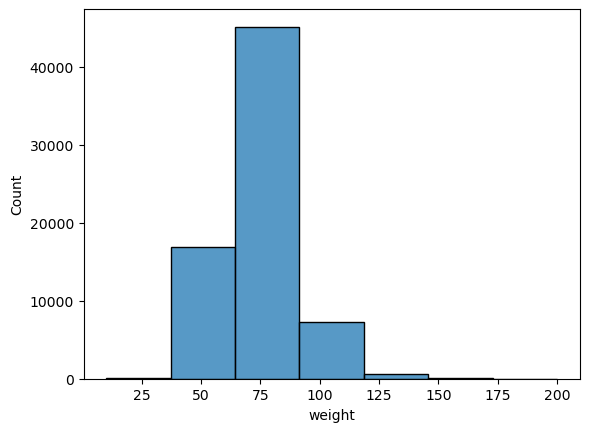

In [ ]:
sns.histplot(cardio.weight, bins=7)

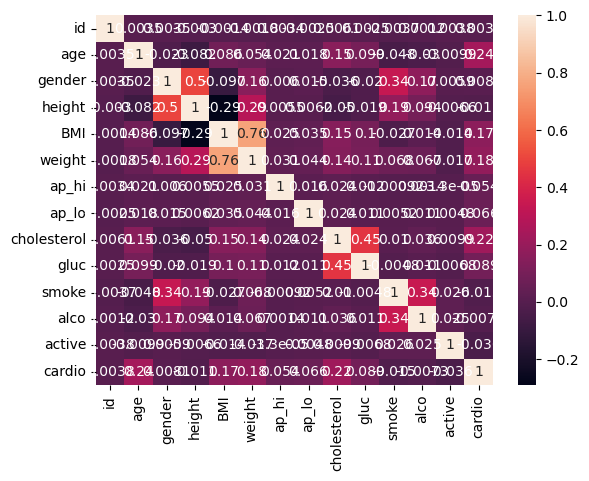

In [33]:
ax = sns.heatmap(cardio.corr(), annot=True)
 #passing the cardio dataframe to the correlation plot function. Output is a heatmap

In [35]:
cardio_majority = cardio[cardio.cardio == 1]
cardio_minority = cardio[cardio.cardio == 0]
cardio_minority_upsampled = resample(cardio_minority, replace=True, n_samples=33053, random_state=34)
cardio_fin = pd.concat([cardio_majority, cardio_minority_upsampled])
print(cardio_fin.cardio.value_counts())

1    34979
0    33053
Name: cardio, dtype: int64


In [36]:
X = cardio.drop(columns= ['cardio'], axis=1) 
y = cardio.cardio.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40,stratify=y, shuffle=True,random_state=1)

In [43]:
logistic_regression = LogisticRegression(X_train, y_train, X_test,y_test)

TypeError: __init__() takes from 1 to 2 positional arguments but 5 were given

In [39]:
rfe_selector = RFE(estimator=logistic_regression, n_features_to_select=13, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

NameError: name 'logistic_regression' is not defined

In [ ]:
rdg = Ridge()
alphas = 10**np.linspace(10,-2,100)*0.5
ridge_cv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

In [ ]:
ridge_reg = Ridge(alpha = ridge_cv.alpha_, normalize = True)
ridge_reg.fit(X_train, y_train)
mean_squared_error(y_test, ridge_reg.predict(X_test))

In [ ]:
ridge_reg.fit(X, y)
pd.Series(ridge_reg.coef_, index = X.columns)

In [ ]:
lasso = Lasso(max_iter = 10000, normalize = True)
lasso_cv = LassoCV(alphas = None, cv = 5, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso.set_params(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)
y_preds_lasso = lasso.predict(X_test)
mean_squared_error(y_test, lasso.predict(X_test))

In [ ]:
lasso_cv.alpha_

In [ ]:
pd.Series(lasso.coef_, index=X.columns)



In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds_lasso)